In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
file_name = "bench_1000_15_2102.npz"

data = np.load(data_path+file_name, allow_pickle=True)

In [141]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
batch_sizes = range(250, 1751, 250)
file_names = list()
for batch_size in batch_sizes:
    file_names.append(f"bench_{batch_size}_15_2103.npz") 

print(file_names)

data_files = list()
for file_name in file_names:
    data = np.load(data_path+file_name, allow_pickle=True)
    data_files.append(data)


['bench_250_15_2103.npz', 'bench_500_15_2103.npz', 'bench_750_15_2103.npz', 'bench_1000_15_2103.npz', 'bench_1250_15_2103.npz', 'bench_1500_15_2103.npz', 'bench_1750_15_2103.npz']


In [130]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
horizon_len = range(10, 16, 5)
file_names = list()
for horizon in horizon_len:
    file_names.append(f"bench_1000_{horizon}_2104.npz") 

print(file_names)

data_files = list()
for file_name in file_names:
    data = np.load(data_path+file_name, allow_pickle=True)
    data_files.append(data)


['bench_1000_10_2104.npz', 'bench_1000_15_2104.npz']


In [87]:
data = data_files[0]
key_list = data.files

for key in key_list:
    print(f'{key} : {data[key].shape}')

batch_size : (1,)
horizon : (1,)
total_time : (21,)
step_time : (21,)
success : (21,)
reason : (21,)
target_0 : (21, 7)
theta : (21,)
thetadot : (21,)
cost_r : (21,)
cost_eef_to_obj : (21,)
cost_obj_to_targ : (21,)
cost_dist : (21,)
cost_zy : (21,)


In [37]:
print(data['batch_size'])
print(data['horizon'])
print(data['total_time'])
print(data['success'])
print(data['reason'])

[250]
[15]
[80.48254395 13.44670057 44.7835741  43.57745385 50.10594749 18.87651825
 60.04871106 34.5446806  15.86303091 11.74855518 26.61013913]
[0 0 0 0 0 0 0 0 0 0 0]
['timeout' 'collision' 'fall' 'fall' 'fall' 'collision' 'timeout' 'fall'
 'collision' 'collision' 'fall']


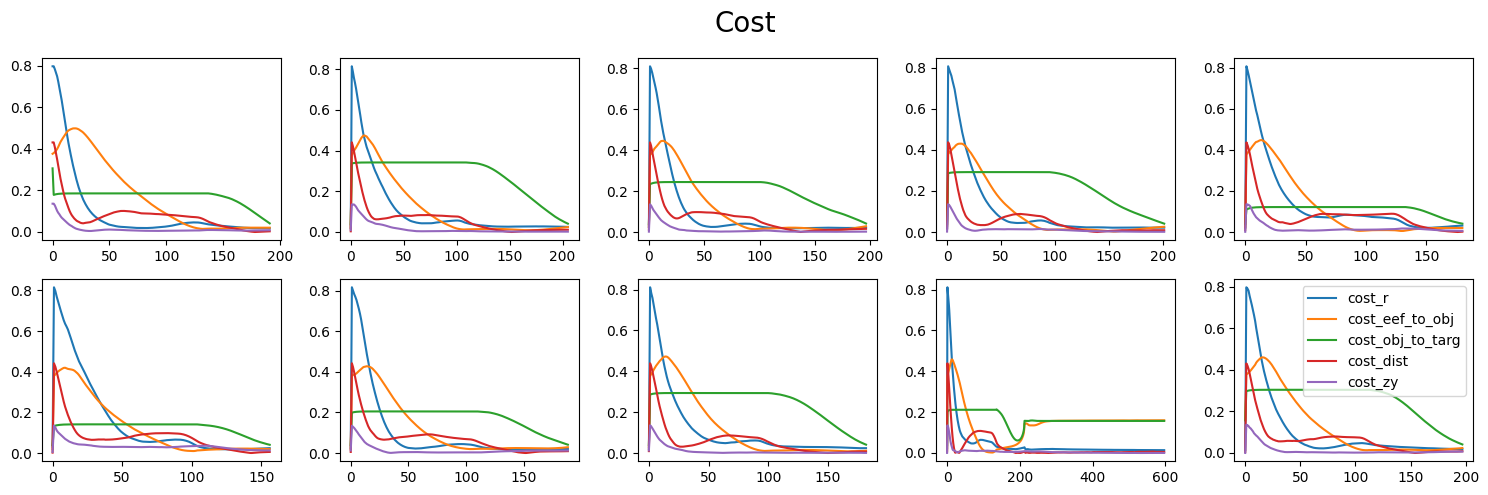

In [131]:
cost_name_list = ['cost_r', 'cost_eef_to_obj', 'cost_obj_to_targ', 'cost_dist', 'cost_zy']


fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        for cost in cost_name_list:
            axes[i, j].plot(data[cost][idx], label=cost)
        idx+=1

fig.suptitle("Cost", fontsize=20)

plt.tight_layout()  
plt.legend()
plt.show()

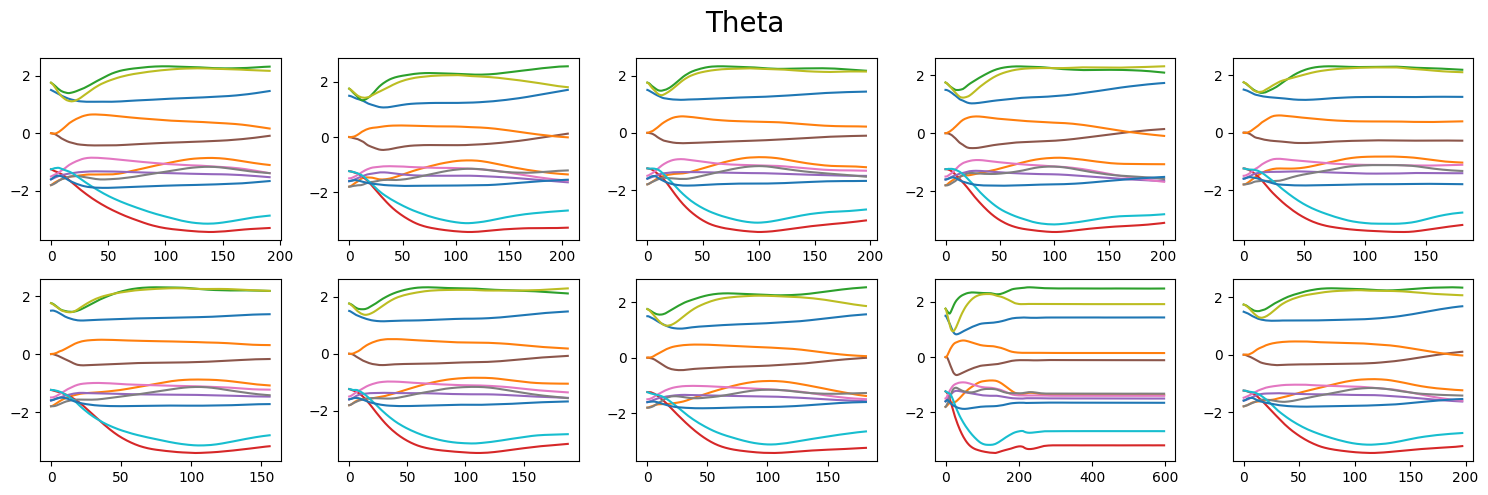

In [132]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        axes[i, j].plot(data['theta'][idx])
        idx+=1

fig.suptitle("Theta", fontsize=20)

plt.tight_layout()  
plt.show()

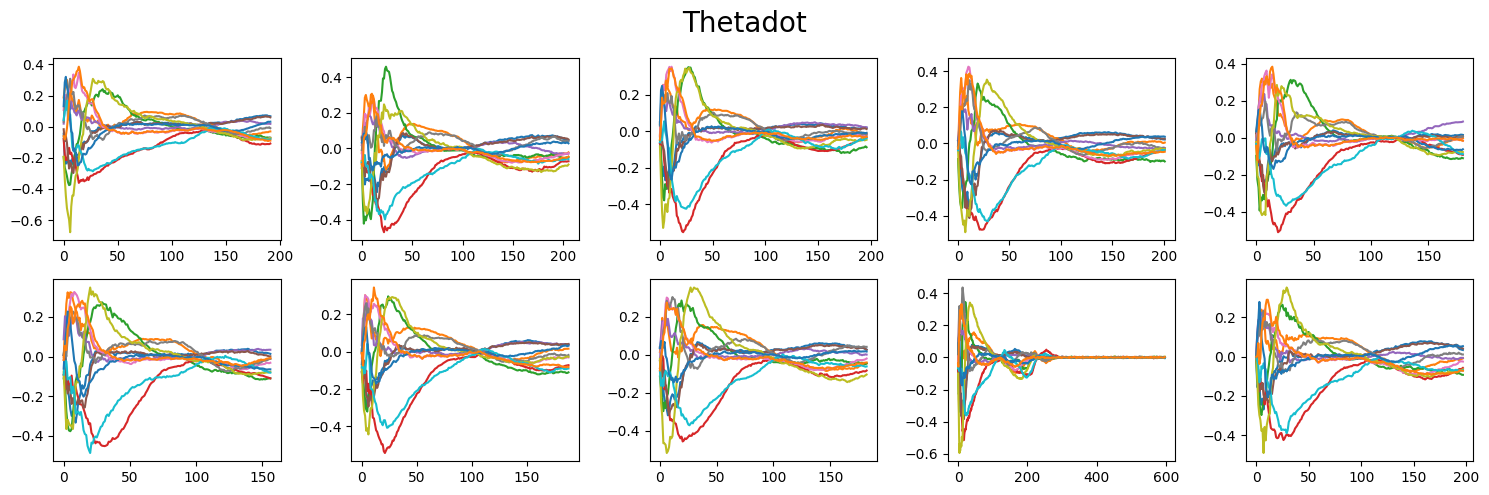

In [133]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        axes[i, j].plot(data['thetadot'][idx])
        idx+=1

fig.suptitle("Thetadot", fontsize=20)

plt.tight_layout()  
plt.show()

3
9
11
14
14
18
18
[15, 45, 55, 70, 70, 90, 90]


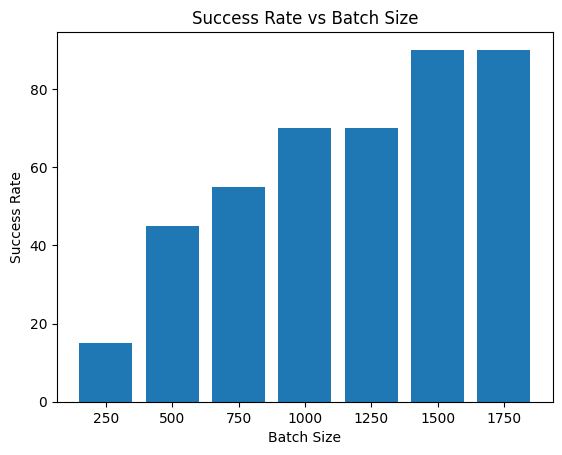

In [142]:
success_rate = list()
for data in data_files:
    success = data['success'][1:]
    print(sum(success))
    success_rate.append(int(sum(success)/len(success)*100))

print(success_rate)

plt.xlabel("Batch Size")
plt.ylabel("Success Rate")
plt.title("Success Rate vs Batch Size")
plt.bar(batch_sizes, success_rate, width=200)
plt.show()


3
9
11
14
14
18
18
[15, 45, 55, 70, 70, 90, 90]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (7,).

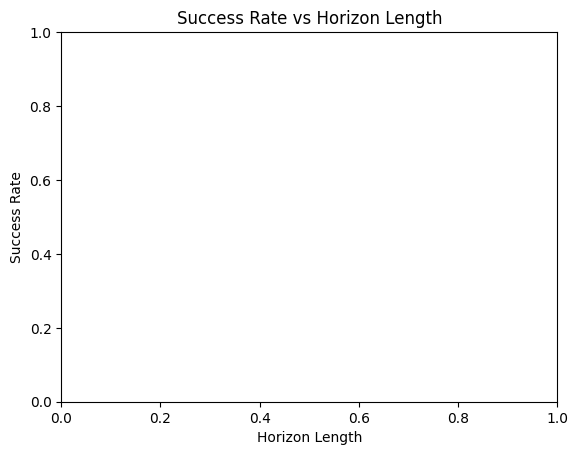

In [143]:
success_rate = list()
for data in data_files:
    success = data['success'][1:]
    print(sum(success))
    success_rate.append(int(sum(success)/len(success)*100))

print(success_rate)

plt.xlabel("Horizon Length")
plt.ylabel("Success Rate")
plt.title("Success Rate vs Horizon Length")
plt.bar(horizon_len, success_rate, width=2)
plt.show()

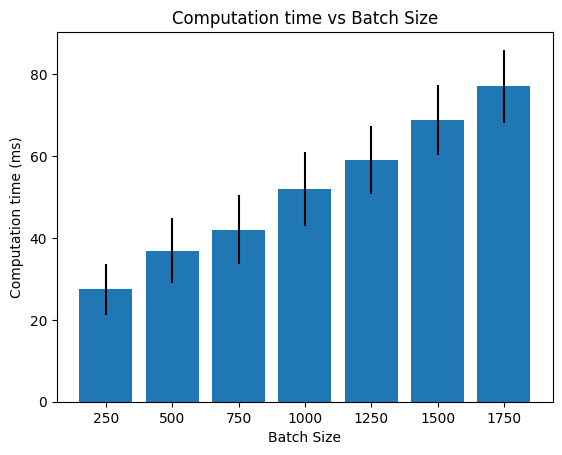

In [144]:
comp_time_mean = list()
comp_time_std = list()

for data in data_files:
    comp_time = np.concatenate(data['step_time'][1:])
    comp_time_mean.append(np.mean(comp_time[1:]))
    comp_time_std.append(np.std(comp_time[1:]))




plt.xlabel("Batch Size")
plt.ylabel("Computation time (ms)")
plt.title("Computation time vs Batch Size")
plt.bar(batch_sizes, comp_time_mean, yerr=comp_time_std, width=200)
plt.show()

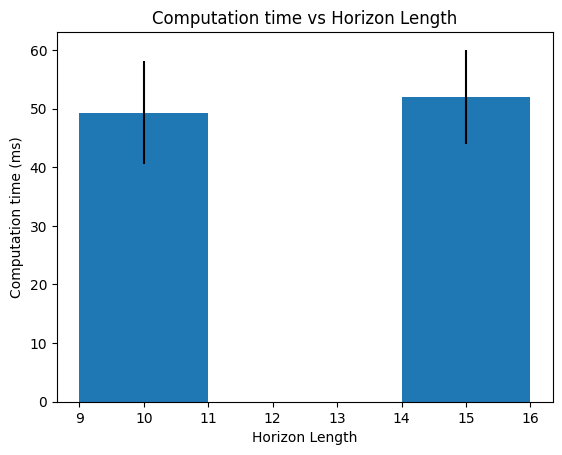

In [140]:
comp_time_mean = list()
comp_time_std = list()

for data in data_files:
    comp_time = np.concatenate(data['step_time'][1:])
    comp_time_mean.append(np.mean(comp_time[1:]))
    comp_time_std.append(np.std(comp_time[1:]))

plt.xlabel("Horizon Length")
plt.ylabel("Computation time (ms)")
plt.title("Computation time vs Horizon Length")
plt.bar(horizon_len, comp_time_mean, yerr=comp_time_std, width=2)
plt.show()

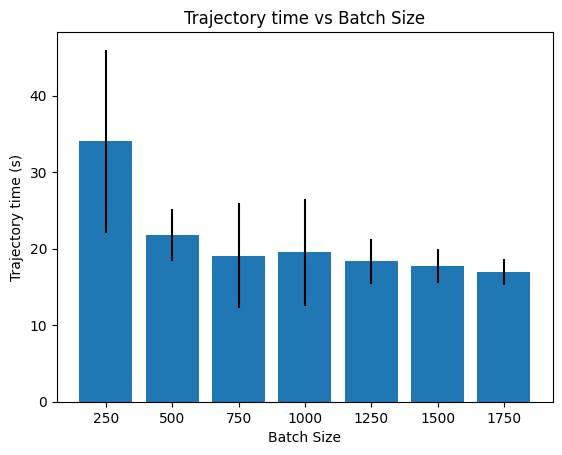

In [145]:
total_time_mean = list()
total_time_std = list()

for data in data_files:
    success = np.array(data['success'][1:], dtype=bool)
    comp_time = np.array(data['total_time'][1:])[success]
    total_time_mean.append(np.mean(comp_time))
    total_time_std.append(np.std(comp_time))

plt.xlabel("Batch Size")
plt.ylabel("Trajectory time (s)")
plt.title("Trajectory time vs Batch Size")
plt.bar(batch_sizes, total_time_mean, yerr=total_time_std, width=200)
plt.show()

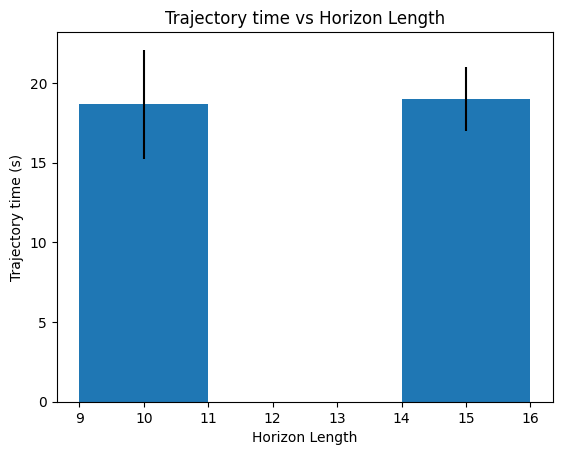

In [142]:
total_time_mean = list()
total_time_std = list()

for data in data_files:
    success = np.array(data['success'][1:], dtype=bool)
    comp_time = np.array(data['total_time'][1:])[success]
    total_time_mean.append(np.mean(comp_time))
    total_time_std.append(np.std(comp_time))

plt.xlabel("Horizon Length")
plt.ylabel("Trajectory time (s)")
plt.title("Trajectory time vs Horizon Length")
plt.bar(horizon_len, total_time_mean, yerr=total_time_std, width=2)
plt.show()